# Regression 2

Error analysis of the linear regression

## Dictionary:
* goodness of fit - calidad del ajuste
* spread - extension?
* spread of the distribution - propagación de la distribución
* mean - promedio
* width - anchura (ancho)
* wealth - riqueza
* salary - salario
* citizens - ciudadanos
* guess - adivinar
* wider - mas ancho
* recall - recordarse
* hence - por eso, entonces

## Order of the class:
* error analysis - three types of error:
   * Data spread or standard error of the regression (characterizes the data)
   * R-squared $R^2$ or percentage error of the regression (characterizes the data)
   * goodness of fit or quality of fit: $\chi^2$ chi-squared (similar to E) (characterizes the fit)
   * error of the individual fit coefficients (characterizes the fit)


## .... a little bit on mean, spread and error
* lets imagine we have two cities in two different countries $city \ 1$ and $city \ 2$
* each city has the same number of habitants 10.000
* in each city the average salary is the same 2000 USD/ month
* the average salary is not everything that would characterize the wealth of its citizens

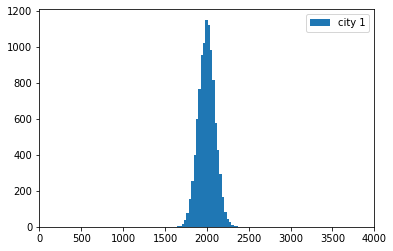

In [63]:
import matplotlib.pyplot as plt
import numpy as np
mu1,sigma1 = 2000,100.1
s_normal = np.random.normal(mu1, sigma1, 10000)
fig,ax=plt.subplots(1,1)
bins=30
ax.hist(s_normal,bins,label='city 1')
ax.set_xlim(0,2*mu1)
ax.legend()

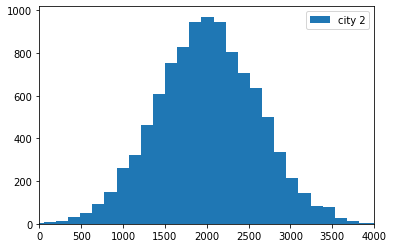

In [64]:
import matplotlib.pyplot as plt
import numpy as np
mu1,sigma1 = 2000,600.1
s_normal = np.random.normal(mu1, sigma1, 10000)
fig,ax=plt.subplots(1,1)
bins=30
ax.hist(s_normal,bins,label='city 2')
ax.set_xlim(0,2*mu1)
ax.legend()

* in both cities the mean (average salary) is the same $\mu=$2000
* the difference is spread or $\sigma$ (sigma)
* sigma means deviation from the mean
* clearly in the the second distribution the deviation from the mean is higher
* spread $\sigma$ is in general the half of the width at 0.6 hight of the distribution.

# in which city is easier to predict the salary?
* in city 1 because the spread (variation is smaller)
* in city 2 guessing the salary we make a bigger error because of its wider spread

### Going back to Physics and regression

## Recall the problem from the previous class

A body is moving under the influence of an external force, the variation of the position measured for different 
times are compiled in table 1. 

| t(s) | x(m) | v(m/s)         
| :------: |:-------------: | :-------:|
|0| 2.76 | 33.10
| 1.11| 29.66 | 21.33
| 2.22|46.83 | 16.57
|3.33 | 44.08 |-5.04
| 4.44| 37.26| -11.74
| 5.55| 12.03| -27.32| 

data: $v_i(t_i)$

* $v_i$ are the data points


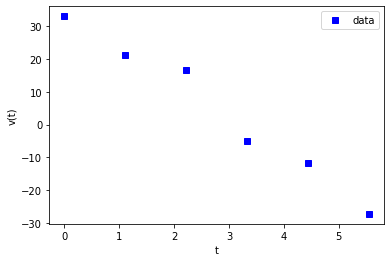

In [1]:
import numpy as np
import matplotlib.pyplot as plt
t=np.array([0,1.11, 2.22,3.33, 4.44, 5.55])
v=np.array([ 33.10, 21.33, 16.57,-5.04, -11.74, -27.32])
fig,ax=plt.subplots(1,1)
ax.plot(t,v,'sb', label='data')
ax.set_xlabel('t')
ax.set_ylabel('v(t)')
ax.legend()

## Recall the linear regression

Knowing that the problem is linear
we are looking for a function that minimizes the sum of the squares of the residuals:

$$
E = E(a_0,a_1) = \sum_{i=1}^{m}[y_i - f(x_i)]^2 
$$

$$
E = E(a_0,a_1) = \sum_{i=1}^{m}[y_i - (a_1 x_i + a_0)]^2 
$$
where:

$$S_i=y_i - (a_1 x_i + a_0)$$
are residuals

$$
E = \sum_{i=1}^{m}[S_i]^2 
$$

$a_0,a_1=$?

### ...using the more complicated code:

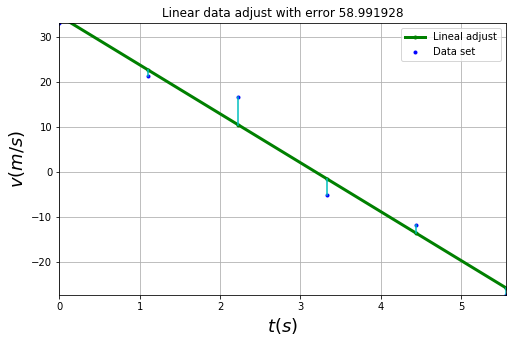

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Finding adjusting parameters 
def Linear_least_square( x,y ):
    
    #Finding coefficients 
    length = len(x)
    square_x = np.sum([x[i]**2 for i in range(length)])
    sum_xy = np.sum([x[i]*y[i] for i in range(length)])
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    a0 = ( square_x*sum_y - sum_xy*sum_x ) / ( length*square_x  - sum_x**2 )
    a1 = ( length*sum_xy - sum_x*sum_y ) / ( length*square_x  - sum_x**2 )
    
    #Returning a_0 and a_1 coefficients
    return np.array([a0,a1])

#Line function adjusting the data set
def Line(a0,a1,x):
    return a0+a1*x

#========================================================
# Adjusting to a first order polynomial the data set v 
#========================================================
#Setting figure
plt.figure( figsize = (8,5) )

#Time
t = np.array([ 0.,  1.11,  2.22,  3.33,  4.44, 5.55])

#Velocities measured for every time t[i]
v = np.array([33.10, 21.33, 16.57, -5.04, -11.74, -27.32])

#Making data adjust
a0, a1 = Linear_least_square( t,v )

#Finding error associated to linear approximation
E = np.sum([ ( v[i] - Line(a0,a1,t[i]) )**2  for i in range(len(t))])

#Plotting solution
plt.plot( t, Line(a0,a1,t), ".-", lw = 3.,color = "green",label="Lineal adjust" )
plt.plot( t, v, ".",color = "blue", label = "Data set" )
for i in range(len(t)):
    plt.plot(np.array([t[i],t[i]]), np.array([v[i],Line(a0,a1,t[i])]),"c-")
    
#Format of figure
plt.xlabel( "$t(s)$", fontsize = 18 )
plt.ylabel( "$v(m/s)$", fontsize = 18 )
plt.xlim( (t[0], t[-1]) )
plt.ylim( (v[-1], v[0]) )
plt.title("Linear data adjust with error %f"%E)
plt.legend()
plt.grid(1)


In [24]:
print('The coefficients are:')
print(f'a1={a1:.2f} ')
print(f'a0={a0:.2f} ')
print()
print('Hence the function that minimizes the residuals is:')
print(f'f(x)={a1:.2f}x  + {a0:.2f}')

The coefficients are:
a1=-10.89 
a0=34.69 

Hence the function that minimizes the residuals is:
f(x)=-10.89x  + 34.69


$$
E =  \sum_{i=1}^{m}[v_i - f(x)]^2 
$$

because of the general formula:

$$
E =  \sum_{i=1}^{m}[y_i - f(x)]^2 
$$

# Error analysis:

### Data spread or standard error of the regression
* The standard error of the regression provides the absolute measure of the typical distance that the data points fall from the regression line. S is in the units of the dependent variable.

* Standard deviation of estimate or spread of data around the regression line


<img src="imgs/std_regression.png" width="300" />


$$
E =  \sum_{i=1}^{m}[y_i - (a_1 x_i + a_0)]^2 
$$

$$
E = \sum_{i=1}^{m}[S_i]^2 
$$ 

$$ S_{y/x}= \sqrt{\frac{E}{m-2}}$$

In [25]:
Std_xy=np.sqrt(E/(len(t)-2))
print('Standard error:', Std_xy)

Standard error: 3.840310131325584


### R-squared $R^2$

* R-squared is a statistical measure of the percentage of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

    0% indicates that the model explains none of the variability of the response data around its mean.
    100% indicates that the model explains all the variability of the response data around its mean.

In general, the higher the R-squared, the better the model fits your data. 

<img src="imgs/R2_vs_R2.png" width="600" />

* how do we calculate $R^2$:

$$R^2=\frac{SS_{regression}}{SS_{total}} $$

where:

$SS_{regression} = $(Sum of the Squares of the regression)

$$ 
SS_{regression}  = \sum_{i=1}^{m}[y_i - (a_1 x_i + a_0)]^2 = E
$$

$SS_{total} = $(Total Sum of the Squares)

$$ 
SS_{total}  = \sum_{i=1}^{m}[y_i - \bar{y}]^2 = E
$$
where $\bar{y}$ its just an average of all the $y's$

In [5]:
# R2=1−SS_regr/SS_tot
SS_regr=E
SS_tot=np.sum((v-np.mean(v))**2.0)
R_squared = 1.0 - (SS_regr)/(SS_tot) 
print('R_squared=',R_squared)

R_squared= 0.9774336425333997


## Difference between relative ($R^2$) and absolute measure ($S$)
*taken from internet

Suppose we're talking about how fast a car is traveling. R-squared is equivalent to saying that the car went 80% faster. That sounds a lot faster! However, it makes a huge difference whether the initial speed was 20 Km/h or 90 Km/h. The increased velocity based on the percentage can be either 16 Km/h or 72 Km/h, respectively. One is lame, and the other is very impressive. If you need to know exactly how much faster, the relative measure just isn’t going to tell you.

The residual standard error is equivalent to telling you directly how many MPH faster the car is traveling. The car went 72 Km/h faster. Now that’s impressive!

## Goodness of fit $\chi^2$ chi-squared (E - residuals)
* how well the data is fitted can be also quantified

<table><tr>
<td> <img src="imgs/good_fit.png" width="200" /> </td>
<td> <img src="imgs/bad_fit.png" width="200" /> </td>    
</tr></table>

In [69]:
chi2 = np.mean([ ( v[i] - Line(a0,a1,t[i]) )**2  for i in range(len(t))])
print(chi2)

9.831987936507948


## Error of the slope and the interception

* Before we looked at a general error of the fit: absolute and percentage

* But if we want to know the error of each of the components of the fitting: meaning error of the $a_1$ & $a_0$? 
* so the errors of the slope ($a_1$) and interception ($a_0$)
* this may get a bit more complicated
* but after it gets simplified thanks to scipy.optimize...


### The procedure to calculate the errors of slope and interception:

\begin{align*}
S_x=\sum{x_i}  & & S_y=\sum{y_i} \\
S_{xx}=\sum{x_i^2} & & S_{yx}=\sum{y_i^2} \\
S_{xy}=\sum{x_i y_i}
\end{align*}

$$S_{\epsilon^2} = \frac{1}{m(m-2)} \left[m S_{yy} -S_y^2 - a_1^2 (mS_{xx} - S_x^2) \right]$$

finally:

the error of the slope is:
$$E_{a_1}=\sqrt{\frac{S_{\epsilon^2}}{mS_{xx}-S_x^2}}$$
the error of the interception is:
$$E_{a_0}=\sqrt{E_{a_1}^2 \frac{1}{m} S_{xx}}$$



In [6]:
Sx=np.sum(t)
Sy=np.sum(v)

Sxx=np.sum([(t[i])**2  for i in range(len(t))])
Syy=np.sum([(v[i])**2  for i in range(len(t))])
Sxy=np.sum([(t[i]*v[i])  for i in range(len(t))])

Se2=(1/(len(t)*(len(t)-2))) * (len(t)*Syy - Sy**2 - a1**2 * (len(t)*Sxx - Sx**2))

Ea1=np.sqrt(len(t)*Se2/(len(t)*Sxx-Sx**2))
Ea0=np.sqrt(Ea1**2*Sxx/len(t))

print(f'a1= {a1:.2f} +/- {Ea1:.2f}')
print(f'a0= {a0:.2f} +/- {Ea0:.2f}')


a1= -10.89 +/- 0.83
a0= 34.69 +/- 2.78


## All the above but using scipy.optimize.curve_fit
the power and simplicity of scipy:

In [12]:
def func(x, a1, a0):
    return a1 * x + a0
t = np.array([ 0.,  1.11,  2.22,  3.33,  4.44, 5.55])
v = np.array([33.10, 21.33, 16.57, -5.04, -11.74, -27.32])
xdata=t
ydata=v
p0=np.array([1.0,1.0])
from scipy.optimize import curve_fit
popt, pcov = curve_fit(func, xdata, ydata, p0, method='lm')

In [13]:
# errors:
perr = np.sqrt(np.diag(pcov))
# R-squared
residuals = ydata- func(xdata, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-np.mean(ydata))**2)
R_squared = 1 - (ss_res / ss_tot)


print(f'a1= {popt[0]:.2f} +/- {perr[0]:.2f}')
print(f'a0= {popt[1]:.2f} +/- {perr[1]:.2f}')
print(f'R_squared= {R_squared:.2f}')

a1= -10.89 +/- 0.83
a0= 34.69 +/- 2.78
R_squared= 0.98
